**Assignment Task:** 

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes. 


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [27]:
#Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv") 

In [28]:
df.shape

(1436, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [30]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [31]:
df.isnull().sum() #to check is there any null value

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [32]:
df.duplicated().sum() #to check duplicates

np.int64(1)

In [33]:
df.drop_duplicates(inplace=True) #to remove duplicates

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
# Check outliers
df.boxplot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [36]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

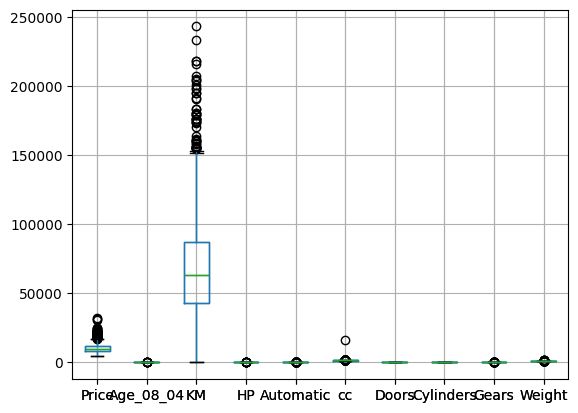

In [37]:
df.boxplot()
plt.show()

In [38]:
#Encode Categorical Variable using LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
1,13750.0,23.0,72937.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
2,13950.0,24.0,41711.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
3,14950.0,26.0,48000.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
4,13750.0,30.0,38500.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,2,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,10845.0,72.0,19000.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,8500.0,71.0,17016.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,7250.0,70.0,16916.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0


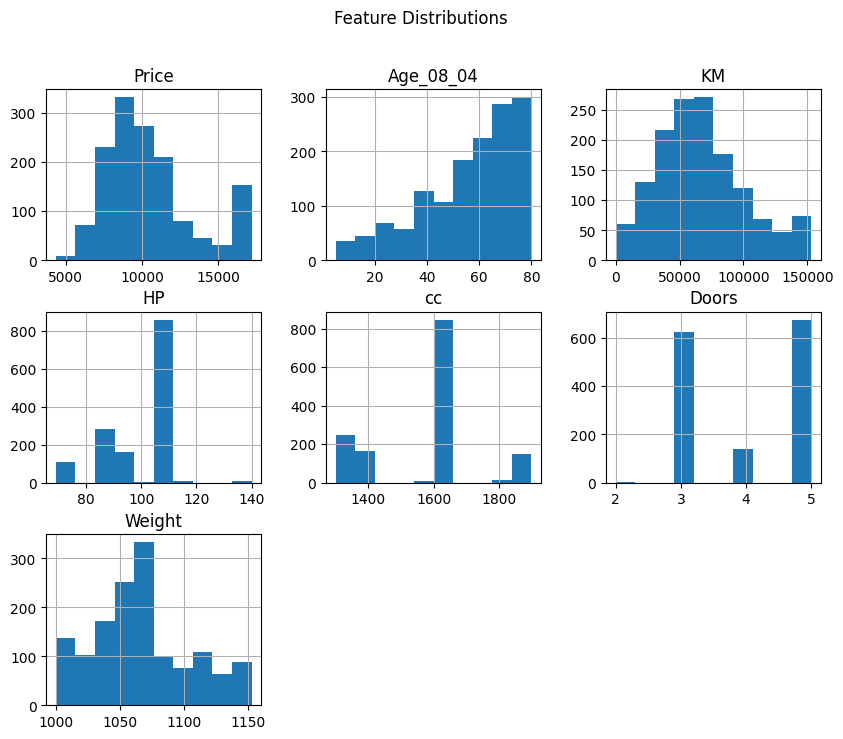

In [39]:
#Histogram
df[['Price','Age_08_04','KM','HP','cc','Doors','Weight']].hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

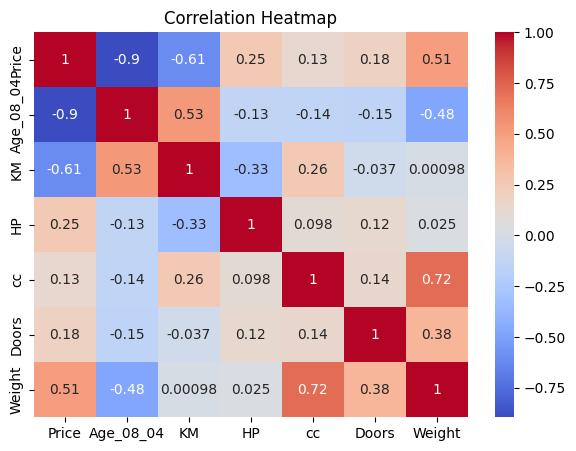

In [40]:
#Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[['Price','Age_08_04','KM','HP','cc','Doors','Weight']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [41]:
# Define Features & Target
features = df[['Age_08_04','KM','Fuel_Type','HP','Automatic','cc','Doors','Weight']]
target   = df['Price']

In [42]:
#Train/Test Split (We divide data into train (80%) & test (20%) sets.)
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.80, random_state=100)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (1148, 8)
x_test shape: (287, 8)
y_train shape: (1148,)
y_test shape: (287,)


In [43]:
#Feature Scalling (We apply **StandardScaler** to normalize numerical features)
scaler = StandardScaler()
num_cols = ['Age_08_04','KM','HP','Automatic','cc','Doors','Weight']

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])


In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Linear Regression Results")
print("MSE  :", mean_squared_error(y_test, y_pred_lr))
print("R2   :", r2_score(y_test, y_pred_lr))
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Linear Regression Results
MSE  : 1269017.8863630767
R2   : 0.8502399214923704
Coefficients: [-1.96475368e+03 -5.18537600e+02  5.05194471e+02  2.64409880e+02
  3.41060513e-13 -3.36068777e+02 -9.03387838e+01  9.88523999e+02]
Intercept: 9545.82164605712


In [45]:
# ✅ Training Validation
y_pred_train = lr.predict(x_train)
print("Training R2 Score:", r2_score(y_train, y_pred_train))

# ✅ Testing Validation
y_pred_test = lr.predict(x_test)
print("Testing R2 Score:", r2_score(y_test, y_pred_test))


Training R2 Score: 0.8689916567072791
Testing R2 Score: 0.8502399214923704


In [46]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

print("\n📌 Ridge Regression Results")
print("MSE  :", mean_squared_error(y_test, y_pred_ridge))
print("R2   :", r2_score(y_test, y_pred_ridge))



📌 Ridge Regression Results
MSE  : 1269354.9613385238
R2   : 0.8502001424038892


In [47]:
# ✅ Training Validation
y_pred_train_ridge = ridge.predict(x_train)
print("Training R2 Score (Ridge):", r2_score(y_train, y_pred_train_ridge))

# ✅ Testing Validation
y_pred_test_ridge = ridge.predict(x_test)
print("Testing R2 Score (Ridge):", r2_score(y_test, y_pred_test_ridge))


Training R2 Score (Ridge): 0.868990682892407
Testing R2 Score (Ridge): 0.8502001424038892


In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

print("\n📌 Lasso Regression Results")
print("MSE  :", mean_squared_error(y_test, y_pred_lasso))
print("R2   :", r2_score(y_test, y_pred_lasso))



📌 Lasso Regression Results
MSE  : 1269033.2741146297
R2   : 0.8502381055440648


In [49]:
# ✅ Training Validation
y_pred_train_lasso = lasso.predict(x_train)
print("Training R2 Score (Lasso):", r2_score(y_train, y_pred_train_lasso))

# ✅ Testing Validation
y_pred_test_lasso = lasso.predict(x_test)
print("Testing R2 Score (Lasso):", r2_score(y_test, y_pred_test_lasso))


Training R2 Score (Lasso): 0.8689916278259502
Testing R2 Score (Lasso): 0.8502381055440648


### Conclusion

- Linear Regression provides strong baseline performance
- Ridge Regression slightly improves generalization by reducing overfitting
- Lasso Regression performs similarly while shrinking weak feature weights